# Automation System Task Part 1
# Wildan Aziz Hidayat - Automation System C
---

1. Mathematical Model of DC Motor (Mechanical and Electrical Equations)
2. Laplace Transform on DC Motor  
3. Transfer Function  the Relationship Between  Angular Velocity ($\omega$) and Voltage (V)

# Make a Laplace Transform Equation

1. Firstly, we must import library from sympy and display to easily on working process
2. Secondly, define a variable contains symbolic variable

In [2]:
import sympy as sp
from sympy import init_printing, Eq, symbols, solve, simplify
from IPython.display import display

# for good display output
init_printing()

# Define symbolic variable
t, s = symbols('t s')
V_s, I_s, Omega_s = symbols('V_s I_s Omega_s')
R, L, J, B, K = symbols('R L J B K')

# Change Mechanical And Electrical Equation to Laplace Transform

1. Change Electrical Equation to Laplace Transform
2. Define New Variable (Eb(𝗌) contains K * Ω(𝗌) and I_s expression for Electrical Equation
3. Define New Variable mech_eq to solve mechanical equation

In [4]:
# Electrical Equation
Eb_s = K * Omega_s  # E_b(s) = K * Omega(s)
I_s_expr = (V_s - Eb_s) / R  # I(s) = (V(s) - E_b(s)) / R

display("Electrical equation after Laplace Transform:", Eq(I_s, I_s_expr))

# Mechanical Equation
mech_eq = Eq(J * s * Omega_s + B * Omega_s, K * I_s)
display("Mechanical equation after Laplace Transform:", mech_eq)

'Electrical equation after Laplace Transform:'

     -K⋅Ωₛ + Vₛ
Iₛ = ──────────
         R     

'Mechanical equation after Laplace Transform:'

B⋅Ωₛ + J⋅Ωₛ⋅s = Iₛ⋅K

# Eliminate Variable Between I(𝗌) and Ω(𝗌)
1. Define New Variable for doing substitution I_s and I_s_expr
2. Solve Ω(𝗌)

In [5]:
# Step 2: Eliminate Variable Between I(s) and Omega(s)
mech_eq_substituted = mech_eq.subs(I_s, I_s_expr)
display("Mechanical equation after substitution I(s):", mech_eq_substituted)

# Solve Omega(s)
Omega_s_solution = solve(mech_eq_substituted, Omega_s)[0]
display("Omega(s) Solution:", Eq(Omega_s, Omega_s_solution))

'Mechanical equation after substitution I(s):'

                K⋅(-K⋅Ωₛ + Vₛ)
B⋅Ωₛ + J⋅Ωₛ⋅s = ──────────────
                      R       

'Omega(s) Solution:'

           K⋅Vₛ      
Ωₛ = ────────────────
                    2
     B⋅R + J⋅R⋅s + K 

# Transfer Function
1. Define New Variable which is contain simpilfy of omega solution / V(𝗌)
2. Make an equation of (Ω / V(𝗌))

In [7]:
# Step 3: Transfer Function G(s) = Omega(s) / V(s)
G_s = simplify(Omega_s_solution / V_s)
display("Transfer Function of G(s) = Omega(s) / V(s):", Eq(Omega_s / V_s, G_s))

'Transfer Function of G(s) = Omega(s) / V(s):'

Ωₛ          K        
── = ────────────────
Vₛ                  2
     B⋅R + J⋅R⋅s + K 

# Simulation on Matplotlib with control library

In [9]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.4 MB/s eta 0:00:00


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Substitusi nilai numerik untuk parameter
params = {R: 1.0, J: 0.01, B: 0.1, K: 0.01}  # Contoh nilai numerik
G_s_numeric = G_s.subs(params)

# Konversi fungsi transfer ke bentuk numerik untuk simulasi
num, den = sp.fraction(G_s_numeric)
num = sp.Poly(num, s).all_coeffs()
den = sp.Poly(den, s).all_coeffs()
num = [float(i.evalf()) for i in num]
den = [float(i.evalf()) for i in den]

# Buat sistem kontrol
system = ctrl.TransferFunction(num, den)

# Simulasi step response
time, response = ctrl.step_response(system)


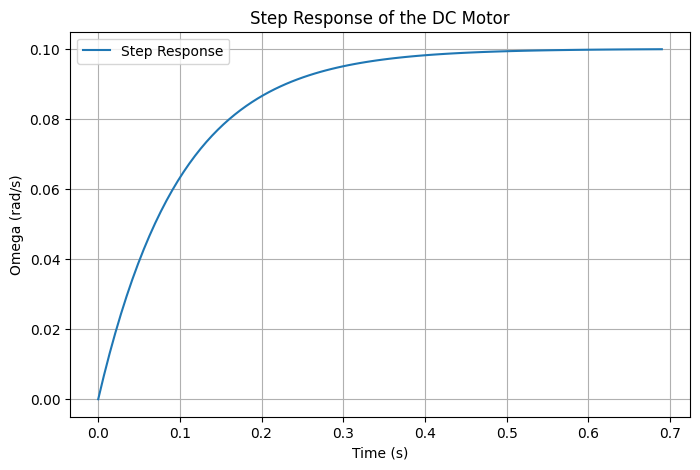

In [ ]:
# Plot hasil
plt.figure(figsize=(8, 5))
plt.plot(time, response, label='Step Response')
plt.xlabel('Time (s)')
plt.ylabel('Omega (rad/s)')
plt.title('Step Response of the DC Motor')
plt.legend()
plt.grid()
plt.show()